# <font color='red'>Tratando os dados do Ifood</font>

### <font color='red'>Instalando as bibliotecas:</font>

Matplotlib, Numpy, Pandas, Seaborn e Wordcloud.

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install wordcloud -q

Note: you may need to restart the kernel to use updated packages.


In [7]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

sns.set_context("talk", font_scale=1)
sns.set_style("darkgrid")
sns.set_palette('tab10')
sns.set_color_codes()

## <font color='red'>Compreendendo os dados de cada arquivo da base</font>

<font color='red'>__enderecos.csv:__</font>
```
    id_usuario
    tipo: indica se é um endereço residencial, de trabalho, etc.
    logradouro
    numero
    complemento
    bairro
    cidade
    estado
    pais
    data_registro: data que um endereço foi cadastrado na conta do usuário.
```
               
<font color='red'>__pedidos.csv__</font>
```
    id_usuario
    id_pedido
    restaurante
    valor
    status: concluído ou cancelado
    data_registro
    data_pedido    
```
    
<font color='red'>__usuarios.csv__</font>
```
    id_usuario
    nome
    cpf
    email
    telefone
    data_registro: data que o usuário de cadastrou na plataforma
```

## <font color='red'>Importando os dados</font>

In [8]:
# Importando dados de endereços cadastrados 
df_enderecos = pd.read_csv('./dados/ifood/enderecos.csv')

df_enderecos.head(5)

,id_usuario,tipo,logradouro,numero,complemento,bairro,cidade,estado,pais,data_registro
0,d896783a-bf28-4ccf-a881-c0a48cf32e6b,NaN,R SETE DE SETEMBRO,365,1702,BOA VISTA,RECIFE,PE,BR,2018-10-12
1,d896783a-bf28-4ccf-a881-c0a48cf32e6b,NaN,R. LUIZ CÂMARA DE ALBUQUERQUE,16,CASA - DUPLEX VERDE LADO ESQUERDO,SANTO ALEIXO,JABOATÃO DOS GUARARAPES,PE,BR,2020-07-20
2,d896783a-bf28-4ccf-a881-c0a48cf32e6b,NaN,R. GRAMADO,136,BLOCO 3 - AP 604,BARRA DE JANGADA,JABOATÃO DOS GUARARAPES,PE,BR,2019-08-25
3,d896783a-bf28-4ccf-a881-c0a48cf32e6b,Trabalho,AV REPUBLICA DO LIBANO,251,NaN,PINA,RECIFE,PE,BR,2018-07-30
4,d896783a-bf28-4ccf-a881-c0a48cf32e6b,NaN,R. PIO XII,395,CASA,CAJUEIRO SECO,JABOATÃO DOS GUARARAPES,PE,BR,2019-03-04


In [9]:
# Importando dados de pedidos 
df_pedidos = pd.read_csv('./dados/ifood/pedidos.csv')

df_pedidos.head(5)

,id_usuario,id_pedido,restaurante,valor,status,data_registro,data_pedido
0,d896783a-bf28-4ccf-a881-c0a48cf32e6b,1612462410,Recanto Nordestino,71.9,CONCLUDED,2018-07-30,2020-03-09
1,d896783a-bf28-4ccf-a881-c0a48cf32e6b,401782309,Imperio Da China,36.9,CONCLUDED,2018-07-30,2019-01-12
2,d896783a-bf28-4ccf-a881-c0a48cf32e6b,401786706,Chef Arabe,34.9,CONCLUDED,2018-07-30,2019-01-12
3,d896783a-bf28-4ccf-a881-c0a48cf32e6b,1547446858,Della Mamma,50.0,CONCLUDED,2018-07-30,2020-02-19
4,d896783a-bf28-4ccf-a881-c0a48cf32e6b,314176243,Domino's Pizza - Gracas,66.9,CANCELLED,2018-07-30,2018-10-13


In [10]:
# Importando dados de usuário
df_usuario = pd.read_csv('./dados/ifood/usuarios.csv')

df_usuario

,id_usuario,nome,cpf,email,telefone,data_registro
0,d896783a-bf28-4ccf-a881-c0a48cf32e6b,Michelle Lira,NaN,MCHLL.LIRA@GMAIL.COM,81 999337749,2018-07-30


## <font color='red'>Verificando o tamanho dos DataFrames</font>

In [11]:
# Verificando o tamanho do dataset
df_enderecos.shape[0]

6

In [12]:
# Verificando o tamanho do dataset
df_pedidos.shape[0]

51

## <font color='red'>Verificando se há dados nulos</font>

In [13]:
# 01 - Endereços
df_enderecos.isnull().sum()

id_usuario       0
tipo             5
logradouro       0
numero           0
complemento      1
bairro           0
cidade           0
estado           0
pais             0
data_registro    0
dtype: int64

In [14]:
# 02 - Pedidos
df_pedidos.isnull().sum()

id_usuario       0
id_pedido        0
restaurante      0
valor            0
status           0
data_registro    0
data_pedido      0
dtype: int64

## <font color='red'>Detalhes dos DataFrames</font>

In [15]:
df_enderecos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_usuario     6 non-null      object
 1   tipo           1 non-null      object
 2   logradouro     6 non-null      object
 3   numero         6 non-null      int64 
 4   complemento    5 non-null      object
 5   bairro         6 non-null      object
 6   cidade         6 non-null      object
 7   estado         6 non-null      object
 8   pais           6 non-null      object
 9   data_registro  6 non-null      object
dtypes: int64(1), object(9)
memory usage: 608.0+ bytes


In [16]:
df_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_usuario     51 non-null     object 
 1   id_pedido      51 non-null     int64  
 2   restaurante    51 non-null     object 
 3   valor          51 non-null     float64
 4   status         51 non-null     object 
 5   data_registro  51 non-null     object 
 6   data_pedido    51 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.9+ KB


In [17]:
df_usuario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id_usuario     1 non-null      object 
 1   nome           1 non-null      object 
 2   cpf            0 non-null      float64
 3   email          1 non-null      object 
 4   telefone       1 non-null      object 
 5   data_registro  1 non-null      object 
dtypes: float64(1), object(5)
memory usage: 176.0+ bytes


## <font color='red'>Convertendo os dados</font>

### <font color='red'>No DataFrame "Endereços"</font>

>A coluna data_registro está com o tipo object, ou seja, string -> Quero o formato datetime     

In [18]:
# Convertendo data_registro de string para datetime
df_enderecos['data_registro'] = pd.to_datetime(df_enderecos['data_registro'])

In [19]:
# 01 - Endereços cadastrados
df_enderecos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id_usuario     6 non-null      object        
 1   tipo           1 non-null      object        
 2   logradouro     6 non-null      object        
 3   numero         6 non-null      int64         
 4   complemento    5 non-null      object        
 5   bairro         6 non-null      object        
 6   cidade         6 non-null      object        
 7   estado         6 non-null      object        
 8   pais           6 non-null      object        
 9   data_registro  6 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 608.0+ bytes


In [20]:
# Exibindo o dtypes com uma melhor formatação, como um DataFrame
pd.DataFrame(df_enderecos.dtypes, columns=['Tipos de dados'])

,Tipos de dados
id_usuario,object
tipo,object
logradouro,object
numero,int64
complemento,object
bairro,object
cidade,object
estado,object
pais,object
data_registro,datetime64[ns]


### <font color='red'>No DataFrame "Pedidos"</font>

>A coluna data_registro está com o tipo object, ou seja, string -> Quero o formato datetime     
>A coluna data_pedido está com o tipo object, ou seja, string -> Quero o formato datetime 

In [21]:
# Convertendo data_registro e data_pedido de string para datetime
df_pedidos['data_registro'] = pd.to_datetime(df_pedidos['data_registro'])

In [22]:
df_pedidos['data_pedido'] = pd.to_datetime(df_pedidos['data_pedido'])

In [23]:
# 02 - Pedidos
df_pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id_usuario     51 non-null     object        
 1   id_pedido      51 non-null     int64         
 2   restaurante    51 non-null     object        
 3   valor          51 non-null     float64       
 4   status         51 non-null     object        
 5   data_registro  51 non-null     datetime64[ns]
 6   data_pedido    51 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(3)
memory usage: 2.9+ KB


In [24]:
# Exibindo o dtypes com uma melhor formatação, como um DataFrame
pd.DataFrame(df_pedidos.dtypes, columns=['Tipos de dados'])

,Tipos de dados
id_usuario,object
id_pedido,int64
restaurante,object
valor,float64
status,object
data_registro,datetime64[ns]
data_pedido,datetime64[ns]


### <font color='red'>No DataFrame: "Usuários"</font>

>A coluna data_registro está com o tipo object, ou seja, string -> Quero o formato datetime 

In [25]:
# Convertendo data_registro de string para datetime
df_usuario['data_registro'] = pd.to_datetime(df_usuario['data_registro'])

In [26]:
# 03 - Usuário
df_usuario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id_usuario     1 non-null      object        
 1   nome           1 non-null      object        
 2   cpf            0 non-null      float64       
 3   email          1 non-null      object        
 4   telefone       1 non-null      object        
 5   data_registro  1 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 176.0+ bytes


In [27]:
pd.DataFrame(df_pedidos['restaurante'].unique(), columns = ['Restaurantes'])

,Restaurantes
0,Recanto Nordestino
1,Imperio Da China
2,Chef Arabe
3,Della Mamma
4,Domino's Pizza - Gracas
5,Cabuloso Burguer
6,Super Sanduba
7,Emporio Prime
8,Recanto Prime
9,K Delivery


In [28]:
df_pedidos['restaurante'].value_counts().head(40)

May Sushi                                  3
Recanto Prime                              3
Coliseu Delivery Hamburgueria Artesanal    3
Recanto Nordestino                         2
Escalante S Tex Mex Candeias               2
Della Mamma                                2
Creperia El Shaday                         2
Bar Do Matuto                              2
Recanto Da Barra                           2
Sr Dogao Dogueria                          1
Vic S Best Food                            1
Jolu Comedoria Japonesa                    1
Brownie Do Jad                             1
Deposito Altas Horas                       1
Valenca Sushi                              1
China Burguer                              1
Moda Nostra Pizza - Candeias               1
Delicia Do Pastel                          1
Dona Do Sabor Lanches E Salgados           1
Crepe's Burguer                            1
Sr Dogao                                   1
China Burguer Oriental                     1
Maya Kebab

In [29]:
pd.DataFrame(df_pedidos['id_pedido'])

,id_pedido
0,1612462410
1,401782309
2,401786706
3,1547446858
4,314176243
5,314184305
6,1240294990
7,887148596
8,1279667192
9,1596523044


In [30]:
df_enderecos['logradouro'].value_counts().head(20)

R SETE DE SETEMBRO               1
R. LUIZ CÂMARA DE ALBUQUERQUE    1
R. GRAMADO                       1
AV REPUBLICA DO LIBANO           1
R. PIO XII                       1
R SERRA TALHADA                  1
Name: logradouro, dtype: int64

In [31]:
# Total gasto em pedidos
df_pedidos['valor'].sum()

2244.57

## <font color='red'>Verificando se há outliers usando um box plot</font>

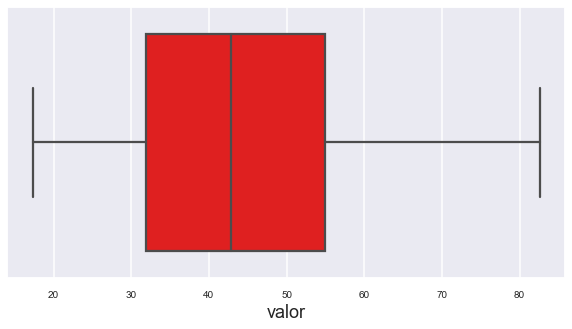

In [32]:
# Configurações dos gráficos
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['font.size'] = 15 
plt.rcParams['axes.titlesize'] = 20

# Identificando outliers nos valores de compras
sns.boxplot(x = df_pedidos['valor'], color='red')
plt.show()

## <font color='red'>Nuvem de palavras</font>

Criei uma wordcloud, com os nomes dos restaurantes nos quais fiz pedido.    
Os restaurantes com mais pedidos tem mais visibilidade.     

In [33]:
# Percorrendo a variável artistName para armazenar na variável músicas
restaurantes = " ".join(s for s in df_pedidos['restaurante'])

# Imprimindo a quantidade de palavras
print(f"Quantidade de Palavras: {len(restaurantes)}")

Quantidade de Palavras: 929


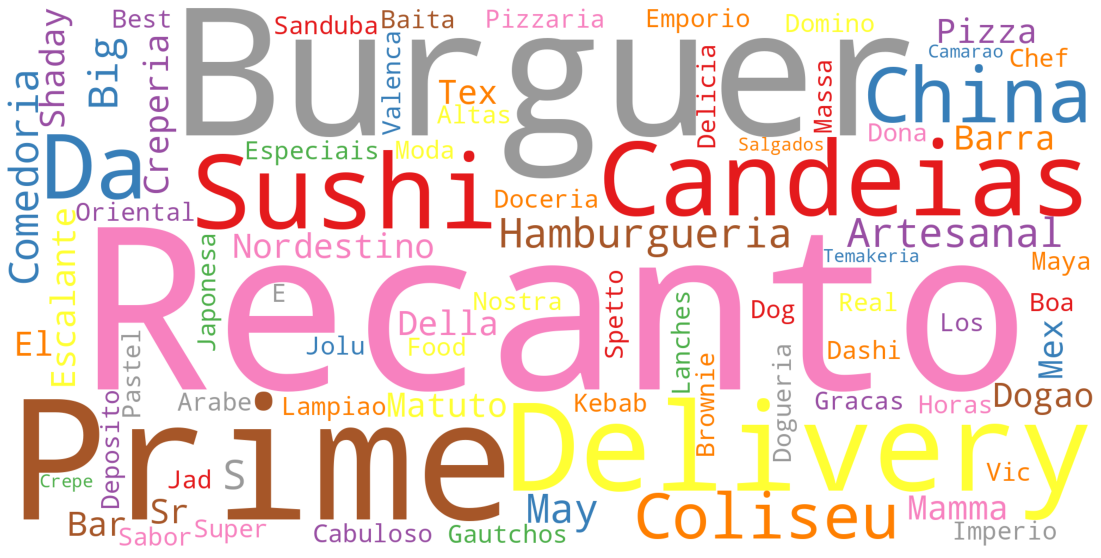

In [34]:
# Gerando uma nuvem de palavras
wordcloud = WordCloud(background_color="white",
                      width=2000, height=1000, random_state=1, contour_color="white", colormap="Set1", collocations=False).generate(restaurantes)

# Definindo detalhes da imagem
fig, ax = plt.subplots(figsize=(20,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
#wordcloud.to_file("restaurantes_ifood_michelle.png");

## <font color='red'>Salvando os DataFrames com dados tratados</font>

In [ ]:
# 01 - Salvando o arquivo com os endereços
#df_enderecos.to_csv('./dados_tratados/ifood/enderecos.csv', index = None)

In [ ]:
# 02 - Salvando os dados dos pedidos 
#df_pedidos.to_csv('./dados_tratados/ifood/pedidos.csv', index = None)

In [ ]:
# 03 - Salvando os dados de usuário
#df_usuario.to_csv('./dados_tratados/ifood/usuarios.csv', index = None)

## <font color='red'>Fim</font>